# pandas iris case study

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [41]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [42]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [51]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_encoded
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [52]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length     150 non-null    float64
 1   sepal_width      150 non-null    float64
 2   petal_length     150 non-null    float64
 3   petal_width      150 non-null    float64
 4   species          150 non-null    object 
 5   species_encoded  150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = iris[['sepal_length', 'sepal_width']]
y = iris['petal_width']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression().fit(X_train, y_train)

y_pred = model.predict(X_test)

In [54]:
print(model.intercept_)
print(model.coef_)

-1.4332547813661838
[ 0.70386915 -0.48088353]


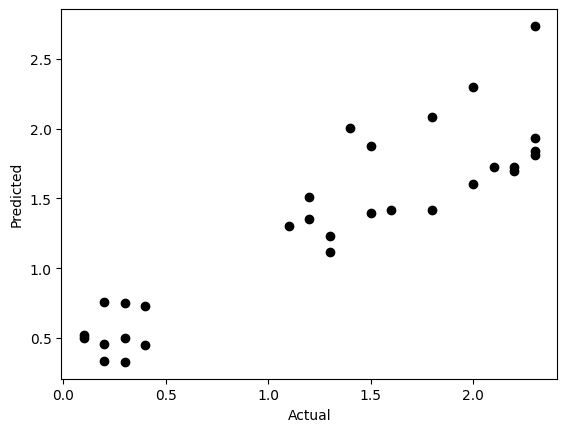

c:\Users\AI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\AI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\AI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

c:\Users\AI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\AI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is depr

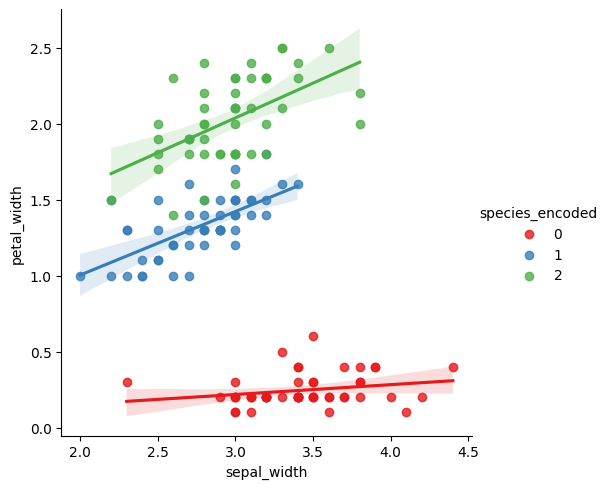

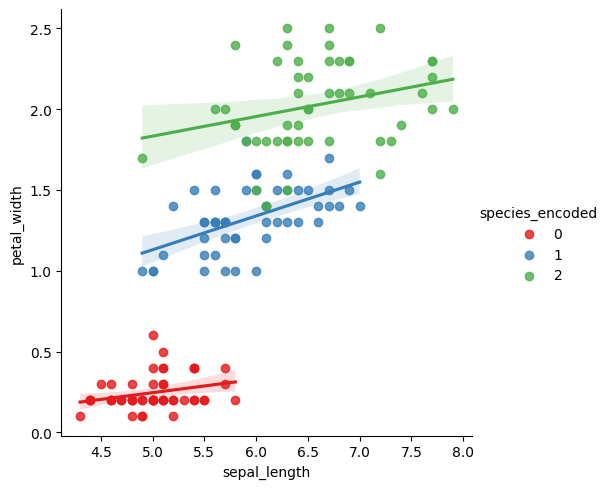

In [56]:
plt.scatter(y_test, y_pred, color='black')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
sns.lmplot(x='sepal_width', y='petal_width', data=iris,hue='species_encoded', palette='Set1')
sns.lmplot(x='sepal_length', y='petal_width', data=iris,hue='species_encoded', palette='Set1')

In [48]:
import plotly.express as px
fig = px.scatter_3d(iris, x='sepal_length', y='petal_width', z='sepal_width', color='species')
fig.show()

In [49]:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.8054269943977049
0.12368141197224108


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [61]:
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['species_encoded']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
models = [LogisticRegression(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()]
model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'KNN']

models_scores = []
for model, model_name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    Recall = recall_score(y_test, y_pred, average='weighted')
    models_scores.append([model_name,accuracy,precision,Recall])

sorted_models = sorted(models_scores, key=lambda x: x[1], reverse=True)
for model in sorted_models:
    print("Accuracy Score: ",f'{model[0]} : {model[1]:.2f}')
    print("precision Score: ",f'{model[0]} : {model[1]:.2f}')
    print("Recall Score: ",f'{model[0]} : {model[1]:.2f}')

c:\Users\AI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy Score:  Logistic Regression : 1.00
precision Score:  Logistic Regression : 1.00
Recall Score:  Logistic Regression : 1.00
Accuracy Score:  SVM : 1.00
precision Score:  SVM : 1.00
Recall Score:  SVM : 1.00
Accuracy Score:  Decision Tree : 1.00
precision Score:  Decision Tree : 1.00
Recall Score:  Decision Tree : 1.00
Accuracy Score:  Random Forest : 1.00
precision Score:  Random Forest : 1.00
Recall Score:  Random Forest : 1.00
Accuracy Score:  KNN : 1.00
precision Score:  KNN : 1.00
Recall Score:  KNN : 1.00


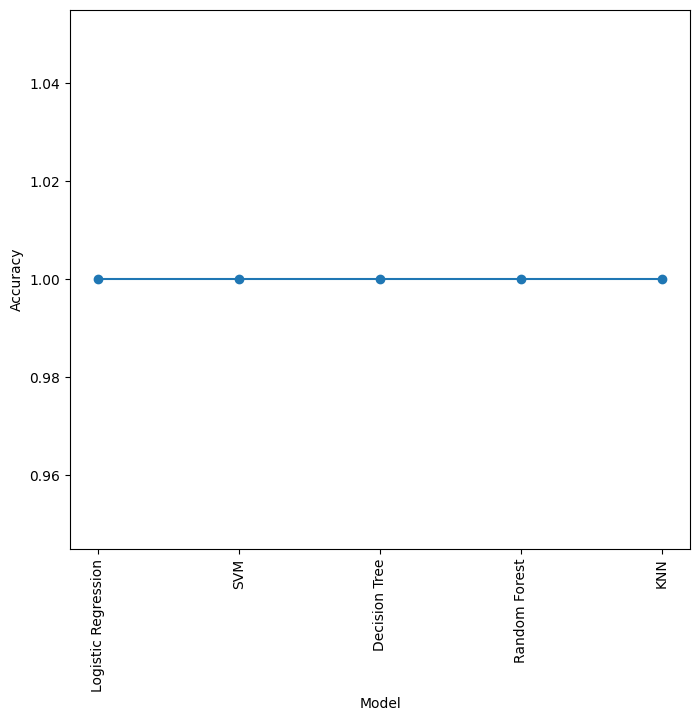

In [85]:
plt.figure(figsize=(8, 7))
plt.plot([model[0] for model in models_scores], [model[1] for model in models_scores], marker='o')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.show()

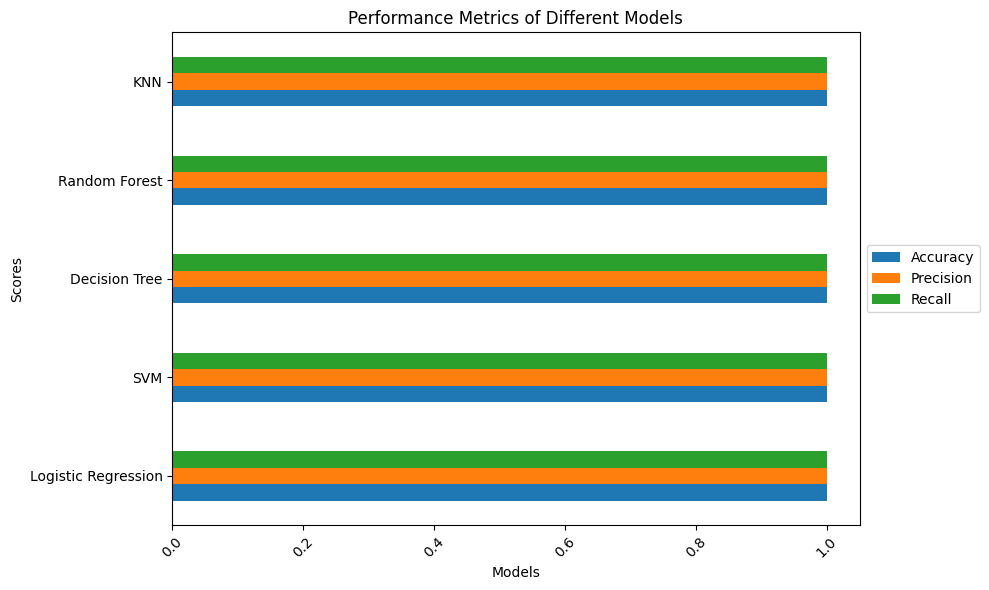

In [86]:
metrics_df = pd.DataFrame(models_scores, columns=['Model', 'Accuracy', 'Precision', 'Recall'])

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
metrics_df.set_index('Model').plot(kind='barh', ax=ax)
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics of Different Models')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()